# Using K Nearest Neighbour 

In [45]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
sb.set() # set the default Seaborn style for graphics

from textblob import TextBlob
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import accuracy_score

from collections import Counter
air_data = pd.read_csv("listings_june.csv")
air_data.shape


(4238, 74)

In [46]:
air_data["price"]=air_data['price'].str.replace(',', '').str.replace('$', '')
air_data["price"] = pd.to_numeric(air_data["price"], downcast='float')

C:\Users\junwe\AppData\Local\Temp/ipykernel_5992/3400756641.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["price"]=air_data['price'].str.replace(',', '').str.replace('$', '')


In [47]:
air_data["num_of_veri"]= air_data["host_verifications"].apply(lambda n: len(n.split(',')))
air_data["num_of_veri"].head()

0    9
1    8
2    9
3    5
4    5
Name: num_of_veri, dtype: int64

In [48]:
air_data["num_of_amenities"]= air_data["amenities"].apply(lambda n: len(n.split(",")))
air_data["num_of_amenities"].head()

0     7
1    12
2     8
3    25
4    21
Name: num_of_amenities, dtype: int64

In [49]:
air_data["new_ratings"]=air_data["review_scores_rating"].apply(np.floor)
air_data["host_is_superhost"]=air_data['host_is_superhost'].fillna('f')


In [50]:
possible = pd.DataFrame(air_data[['host_total_listings_count','accommodates','num_of_veri','num_of_amenities','price','new_ratings','host_is_superhost']])
replace = ['host_total_listings_count','accommodates','num_of_veri','num_of_amenities','price','new_ratings']

In [51]:
for col in replace:
    possible[col] = possible[col].replace(0,np.NaN)
    mean = int(possible[col].median(skipna=True))
    possible[col] = possible[col].replace(np.NaN,mean)

In [52]:
possible['new_ratings']

0       5.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
4233    4.0
4234    4.0
4235    4.0
4236    4.0
4237    4.0
Name: new_ratings, Length: 4238, dtype: float64

In [53]:
X = possible.iloc[:,0:6]

In [54]:
X.head

<bound method NDFrame.head of       host_total_listings_count  accommodates  num_of_veri  num_of_amenities  \
0                           2.0           1.0            9                 7   
1                           1.0           2.0            8                12   
2                           2.0           1.0            9                 8   
3                           8.0           6.0            5                25   
4                           8.0           3.0            5                21   
...                         ...           ...          ...               ...   
4233                        1.0           6.0            4                14   
4234                        1.0           6.0            4                22   
4235                        1.0           6.0            4                23   
4236                        2.0           4.0            6                 6   
4237                        1.0           2.0            4                28   

      pri

In [55]:
y=  possible.iloc[:,6]
y.head

<bound method NDFrame.head of 0       f
1       f
2       f
3       f
4       f
       ..
4233    f
4234    f
4235    f
4236    t
4237    f
Name: host_is_superhost, Length: 4238, dtype: object>

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0, test_size = 0.20)


In [57]:
#Feature Scaling all data is now -1 and 1 
sc_X = StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [58]:
# Defining model: K-NN
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric = 'euclidean')
# Fitting Moddl
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [59]:
#predicting test 
y_pred_test = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[670  44]
 [ 80  54]]


<AxesSubplot:>

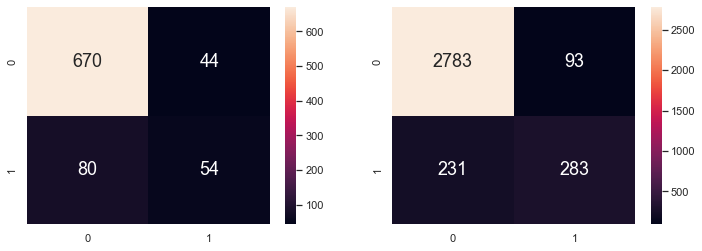

In [60]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_test, y_pred_test),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_train, y_pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [61]:
print(accuracy_score(y_test,y_pred_test))

0.8537735849056604


In [65]:
FP = confusion_matrix(y_train, y_pred_train).sum(axis=0) - np.diag(confusion_matrix(y_train, y_pred_train))  
FN = confusion_matrix(y_train, y_pred_train).sum(axis=1) - np.diag(confusion_matrix(y_train, y_pred_train))
TP = np.diag(confusion_matrix(y_train, y_pred_train))
TN = confusion_matrix(y_train, y_pred_train).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# False negative rate
FNR = FN/(TP+FN)

print("True Positive Rate for Year is  (Depth = 4/Train Data): "+str(TPR[1]))
print("False Positive Rate for Year is (Depth = 4/Train Data): "+str(FNR[0]))

True Positive Rate for Year is  (Depth = 4/Train Data): 0.5505836575875487
False Positive Rate for Year is (Depth = 4/Train Data): 0.032336578581363004


In [67]:
FP = confusion_matrix(y_test,y_pred_test).sum(axis=0) - np.diag(confusion_matrix(y_test,y_pred_test))  
FN = confusion_matrix(y_test,y_pred_test).sum(axis=1) - np.diag(confusion_matrix(y_test,y_pred_test))
TP = np.diag(confusion_matrix(y_test,y_pred_test))
TN = confusion_matrix(y_test,y_pred_test).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# False negative rate
FNR = FN/(TP+FN)
print("True Positive Rate for Year is  (Depth = 4/Train Data): "+str(TPR[1]))
print("False Positive Rate for Year is (Depth = 4/Train Data): "+str(FNR[0]))

True Positive Rate for Year is  (Depth = 4/Train Data): 0.40298507462686567
False Positive Rate for Year is (Depth = 4/Train Data): 0.06162464985994398
